In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [131]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from filters import compute_h_z, filter_b_a, analog_to_digital
import numpy as np

In [128]:
# Peaking EQ
Q = 2
A = 10**(2/10)
b = np.array([1, A/Q, 1])
a = np.array([1, 1/Q, 1])

In [129]:
unit_circle = np.exp(1j*np.linspace(0, 2*np.pi, 1000))

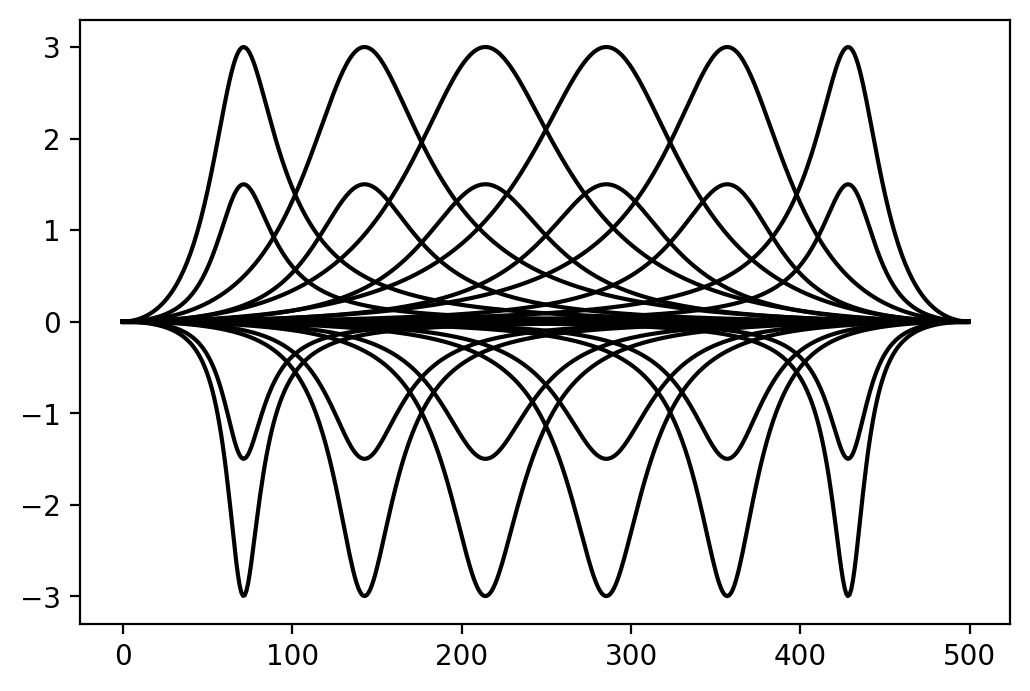

In [132]:
plt.figure(dpi=100)
step = np.pi/7
for A_db in np.linspace(-3, 3, 5):
    A = 10**(A_db/10)
    b = np.array([1, A/Q, 1])
    a = np.array([1, 1/Q, 1])
    for angle in np.arange(step, np.pi, step):
        dft = analog_to_digital(b, a, unit_circle, angle)
        plt.plot(10*np.log10(np.fft.fftshift(np.abs(dft))[dft.size//2:]), c = 'k')